In [1]:
#conda install "notebook>=5.3" "ipywidgets>=7.5"

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
install with $ pip install plotly==4.14.3 
or $ conda install -c plotly plotly=4.14.3
"""
import plotly.express as px

In [3]:
# Get all dataset name in directory
files = [file for file in os.listdir('./Resources')]
all_data = pd.DataFrame()

# Looping to read all dataset
for file in files[1:]:
    # Get column name
    f = open('./Resources/'+file, "r")
    col_names = f.readline().split(",")
    
    # Load dataset
    df = pd.read_csv('./Resources/'+file, names=col_names, skiprows=1, low_memory=False)
    print(f'Shape of {file}', df.shape)
    
    # Merge dataset
    all_data = pd.concat([all_data, df])
    
all_data.reset_index(drop=True, inplace=True)
print('Shape of all_data:', all_data.shape)

# The first three rows of all dataset
all_data.head(3)

10.csv (56250, 19)
11.csv (56250, 19)
12.csv (56250, 19)
13.csv (56250, 19)
14.csv (56250, 19)
8.csv (56250, 19)
9.csv (56250, 19)
Shape of all_data: (393750, 19)


,id,browser_id,os_id,domain_id,device_info_id,visit_id,visitor_id,user_id,device_id,login_status,user_agent,platform,referrer,time,event_time,connection,year,month,day\n
0,cc8d7394-8fa2-480d-bc5f-2362177e9061,pale moon;28.16.0,windows;7,bukalapak.com,;other,162eb0cb-92d4-4bfd-a49f-666e8c8761ff,8eca0aa0-f83d-4f37-92f4-fecd5169c4f0,NaN,NaN,False,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:68...,web-desktop,https://www.bukalapak.com/payment/transactions...,2021-02-10T09:12:45.000Z,2021-02-10T09:12:45.000Z,NaN,2021,2,10
1,0beb15cb-ff11-4e05-9d12-9c06b4d7acd3,chrome mobile;80.0.3987,android;10,m.liputan6.com,generic;generic smartphone,a00d0354-d67a-4c0c-89fc-3f3b0faceb10,f81a4b87-af9b-4e97-9ebc-b3c1f81e6280,NaN,NaN,False,Mozilla/5.0 (Linux; Android 10; V2026) AppleWe...,web-mobile,https://m.liputan6.com/showbiz/read/4479253/al...,2021-02-10T23:23:55.000Z,2021-02-10T23:23:55.000Z,NaN,2021,2,10
2,ccad1699-30c9-40b3-8a33-cda4df0613ec,pale moon;28.15.0,windows;10,bukalapak.com,;other,1065b1eb-8b54-4b91-9d32-ac9238809f32,59166c52-b4e8-40b2-8641-6a445394e257,NaN,NaN,False,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,web-desktop,https://www.bukalapak.com/payment/purchases/BL...,2021-02-10T10:13:53.000Z,2021-02-10T10:13:53.000Z,NaN,2021,2,10


You can refer to these glossaries for details of each field attributes (in sequences)
<li><b>id</b> : record ID</li>
<li><b>browser_id</b> : browser type</li>
<li><b>os_id</b> : Operating System type</li>
<li><b>domain_id</b> : domain or subdomain of webpage</li>
<li><b>device_info_id</b> : device detail information</li>
<li><b>visit_id</b>: users session id</li>
<li><b>visitor_id</b> : unique user id</li>
<li><b>user_id</b> : user login id</li>
<li><b>device_id</b> : device ID</li>
<li><b>login_status</b> : boolean status of user login</li>
<li><b>user_agent</b> : browsers user agent details</li>
<li><b>platform</b> : device platform, ie desktop or mobile</li>
<li><b>referrer</b> : attribution of the visit, source of visitor coming from</li>
<li><b>time</b> : users visit time</li>
<li><b>event_time</b> : logging time</li>
<li><b>connection</b> : type of user connection</li>
<li><b>year</b> : year number</li>
<li><b>month</b> : month number</li>
<li><b>day</b> : day number</li>

In [4]:
all_data.nunique()

id                393750
browser_id          1384
os_id                257
domain_id             88
device_info_id      2448
visit_id          387503
visitor_id        378370
user_id            15988
device_id              0
login_status           2
user_agent         91912
platform               3
referrer          121288
time              278476
event_time        278862
connection             3
year                   3
month                  3
day\n                  8
dtype: int64

Drop column that containe generate id like 'id', 'visit_id', and 'visitor_id', that column doesn't help our analysis and our model at this project.

In [5]:
# drop 'id', 'visit_id', and 'visitor_id'
all_data.drop(columns=['id', 'visit_id', 'visitor_id'], axis=1, inplace=True)

### Check missing values

In [6]:
drop_col = []
for col in all_data.columns:
    miss_val = all_data[col].isna().sum()
    if miss_val > 0:
        print(f'Missing values of [{col}] column: {miss_val} or {round((miss_val / all_data.shape[0]) * 100, 2)}%')
        if ((miss_val / all_data.shape[0]) * 100) > 95 :
            drop_col.append(col)

Missing values of [domain_id] column: 15 or 0.0%
Missing values of [user_id] column: 376852 or 95.71%
Missing values of [device_id] column: 393750 or 100.0%
Missing values of [referrer] column: 14 or 0.0%
Missing values of [connection] column: 393736 or 100.0%


As we know that there are many missing values in 'user_id', 'device_id' and 'connection' columns (above 95%), we can just drop that columns by set <code>axis=1</code>. Another way to deal with missing value from 'domain_id' and 'reffer' by drop the rows of data that contain a missing value using <code>.dropna()</code> function.

In [7]:
# drop 'domain_id', 'user_id' and 'device_id' columns
all_data.drop(columns=drop_col, axis=1, inplace=True)
all_data.dropna(inplace=True)

# check shape of data
all_data.shape

(393735, 13)

In [8]:
for col in all_data.columns:
    if all_data[col].nunique() < 10:
        print(f'{col}')
        print(all_data[col].unique().tolist())
        print('==============')

login_status
[False, True]
platform
['web-desktop', 'web-mobile', '\\"Accept\\":\\"text/html']
year
[2021, '2021', 'web-desktop']
month
[2, '2', 'https://www.bukalapak.com/c/kesehatan-2359/kesehatan-wanita?page=1533&search%5Btodays_deal%5D=1']
day

[10, 11, 12, 13, 14, '8', '2021-02-08T06:48:18.000Z', 9]


There is a unique value for year and month columns (2021-2), drop row that contain year except 2021 then drop year and month columns.

In [9]:
all_data.rename(columns={'day\n': 'date'}, inplace=True)
all_data.replace({'year':{'2021': 2021}, 
                  'month':{'2': 2}, 
                  'date':{'8': 8}}, inplace=True)
all_data[['year', 'month', 'date']].nunique()

year     2
month    2
date     8
dtype: int64

In [10]:
all_data[all_data['year'] != 2021]

,browser_id,os_id,domain_id,device_info_id,login_status,user_agent,platform,referrer,time,event_time,year,month,date
300962,other;,mac os x;10.9.5,bukalapak.com,;other,False,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)...,"\""Accept\"":\""text/html",application/xhtml+xml,application/xml;q=0.9,image/webp,web-desktop,https://www.bukalapak.com/c/kesehatan-2359/kes...,2021-02-08T06:48:18.000Z


In [11]:
all_data.drop([300962], inplace=True)
all_data.reset_index(drop=True, inplace=True)
all_data.drop(columns=['year', 'month'], axis=1, inplace=True)
all_data[300961:300963]

,browser_id,os_id,domain_id,device_info_id,login_status,user_agent,platform,referrer,time,event_time,date
300961,facebook;300.0.0,android;8.1.0,m.kapanlagi.com,generic_android;wv,False,Mozilla/5.0 (Linux; Android 8.1.0; CPH1803 Bui...,web-mobile,https://m.kapanlagi.com/foto/berita-foto/indon...,2021-02-08T22:14:58.000Z,2021-02-08T22:14:58.000Z,8
300962,facebook;289.0.0,android;10,m.kapanlagi.com,vivo;vivo 1938,False,Mozilla/5.0 (Linux; Android 10; vivo 1938 Buil...,web-mobile,https://m.kapanlagi.com/foto/berita-foto/indon...,2021-02-08T19:39:44.000Z,2021-02-08T19:39:44.000Z,8


### Convert Dtype

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393734 entries, 0 to 393733
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   browser_id      393734 non-null  object
 1   os_id           393734 non-null  object
 2   domain_id       393734 non-null  object
 3   device_info_id  393734 non-null  object
 4   login_status    393734 non-null  bool  
 5   user_agent      393734 non-null  object
 6   platform        393734 non-null  object
 7   referrer        393734 non-null  object
 8   time            393734 non-null  object
 9   event_time      393734 non-null  object
 10  date            393734 non-null  object
dtypes: bool(1), object(10)
memory usage: 30.4+ MB


In [13]:
all_data.nunique()

browser_id          1383
os_id                257
domain_id             88
device_info_id      2448
login_status           2
user_agent         91908
platform               2
referrer          121286
time              278469
event_time        278855
date                   7
dtype: int64

There are 2 columns that contain datetime value, 'time' and 'event_time' columns. Convert that columns using <code>.to_datetime()</code> function.

In [14]:
# convert 'time' and 'event_time' columns as datetime
all_data['time'] = pd.to_datetime(all_data['time']).dt.tz_localize(None)
all_data['event_time'] = pd.to_datetime(all_data['event_time']).dt.tz_localize(None)

### Feature engineering

In [15]:
all_data.head(3)

,browser_id,os_id,domain_id,device_info_id,login_status,user_agent,platform,referrer,time,event_time,date
0,pale moon;28.16.0,windows;7,bukalapak.com,;other,False,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:68...,web-desktop,https://www.bukalapak.com/payment/transactions...,2021-02-10 09:12:45,2021-02-10 09:12:45,10
1,chrome mobile;80.0.3987,android;10,m.liputan6.com,generic;generic smartphone,False,Mozilla/5.0 (Linux; Android 10; V2026) AppleWe...,web-mobile,https://m.liputan6.com/showbiz/read/4479253/al...,2021-02-10 23:23:55,2021-02-10 23:23:55,10
2,pale moon;28.15.0,windows;10,bukalapak.com,;other,False,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,web-desktop,https://www.bukalapak.com/payment/purchases/BL...,2021-02-10 10:13:53,2021-02-10 10:13:53,10


Before start out analysis, we can get more information with feature engineering proccess.

In [16]:
df_new = all_data.copy().drop('event_time', axis=1)
df_new.set_index('time', inplace=True)
# extract 'browser_id', 'os_id', 'device_info_id' columns
for col in list(['browser_id', 'os_id', 'device_info_id']):
    col_name = col.split('_')[0]
    df_new[col_name] = df_new[col].apply(lambda x: x.split(';')[0])
    df_new[col_name+'_type'] = df_new[col].apply(lambda x: x.split(';')[1])

# drop original columns
df_new.drop(columns=['browser_id', 'os_id', 'device_info_id'], axis=1, inplace=True)

# replace '' to 'other' value in 'device' column
df_new.replace({'device': {'': 'undefined'}}, inplace=True)

In [17]:
# create function for split and get domain
#def get_name_domain(res):
#    if len(res) >= 4 or res[-2] in list(['000webhostapp', 'blogspot']):
#        res, dom = '.'.join(res[:-2]), '.'.join(res[-2:])
#    elif len(res) == 3 and len(res[1]) > 3:
#        res, dom = '.'.join(res[:-1]), res[2]
#    else:
#        res, dom = res[0], '.'.join(res[1:])
#    return res, dom

def split_domain(domain_name):
    if domain_name[-14:] == 'translate.goog':
        domain_name = '.'.join(domain_name.split('.')[0].split('-')[2:])
        
    if domain_name[:2] == 'm.':
        site = domain_name[2:].split('.')
    else:
        site = domain_name.split('.')
    #site, domain = get_name_domain(site)[0], get_name_domain(site)[1]
    return '.'.join(site)

In [18]:
# extract 'domain_id' column
#df_new['situs'] = df_new['domain_id'].apply(lambda x: split_domain(x)[0])
df_new['domain'] = df_new['domain_id'].apply(lambda x: split_domain(x))

# drop original column
df_new.drop(columns=['domain_id'], axis=1, inplace=True)

In [19]:
# extract 'time' and 'event_time' column
#for col in list(['time', 'event_time']):
#    df_new[col+'_hms'] = df_new[col].dt.time

# drop original columns
#df_new.drop(columns=['time', 'event_time'], axis=1, inplace=True)

In [20]:
df_new.nunique()

login_status         2
user_agent       91908
platform             2
referrer        121286
date                 7
browser            102
browser_type      1059
os                  12
os_type            242
device              44
device_type       2307
domain              66
dtype: int64

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 393734 entries, 2021-02-10 09:12:45 to 2021-02-09 19:44:11
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   login_status  393734 non-null  bool  
 1   user_agent    393734 non-null  object
 2   platform      393734 non-null  object
 3   referrer      393734 non-null  object
 4   date          393734 non-null  object
 5   browser       393734 non-null  object
 6   browser_type  393734 non-null  object
 7   os            393734 non-null  object
 8   os_type       393734 non-null  object
 9   device        393734 non-null  object
 10  device_type   393734 non-null  object
 11  domain        393734 non-null  object
dtypes: bool(1), object(11)
memory usage: 36.4+ MB


In [22]:
df_new.head()

,login_status,user_agent,platform,referrer,date,browser,browser_type,os,os_type,device,device_type,domain
time,,,,,,,,,,,,
2021-02-10 09:12:45,False,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:68...,web-desktop,https://www.bukalapak.com/payment/transactions...,10,pale moon,28.16.0,windows,7,undefined,other,bukalapak.com
2021-02-10 23:23:55,False,Mozilla/5.0 (Linux; Android 10; V2026) AppleWe...,web-mobile,https://m.liputan6.com/showbiz/read/4479253/al...,10,chrome mobile,80.0.3987,android,10,generic,generic smartphone,liputan6.com
2021-02-10 10:13:53,False,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,web-desktop,https://www.bukalapak.com/payment/purchases/BL...,10,pale moon,28.15.0,windows,10,undefined,other,bukalapak.com
2021-02-10 22:18:02,False,Mozilla/5.0 (Linux; Android 10; RMX1821) Apple...,web-mobile,https://m.bukalapak.com/p-gs/rumah-tangga/furn...,10,chrome mobile,87.0.4280,android,10,generic,generic smartphone,bukalapak.com
2021-02-10 14:14:59,False,Mozilla/5.0 (Linux; Android 10; SM-G965F) Appl...,web-mobile,https://m.merdeka.com/foto/artis/1272931/20210...,10,chrome mobile,88.0.4324,android,10,samsung,samsung sm-g965f,merdeka.com


# Exploratory Data Analysis

In [23]:
df_new.describe()

,login_status,user_agent,platform,referrer,date,browser,browser_type,os,os_type,device,device_type,domain
count,393734,393734,393734,393734,393734,393734,393734,393734,393734,393734,393734,393734
unique,2,91908,2,121286,7,102,1059,12,242,44,2307,66
top,False,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,web-mobile,https://m.vidio.com/live/665-rcti,9,chrome mobile,88.0.4324,android,10,generic,generic smartphone,brilio.net
freq,376836,11946,341397,2759,56250,178700,112851,329295,136476,94184,94169,83984


In [24]:
#for date in range(8, 15):
    # check top value on each date
#    print(f'\033[1mTop value on each column at {date}-2-2021\033[0m')
#    for col in df_new.columns:
#        top = df_new[df_new['date'] == date][col].describe().top
#        freq = df_new[df_new['date'] == date][col].describe().freq
#        print('|', col, ':', (freq, top))
#    print('=============================================================\n')

##  Visualization of data distribution

### 'login_status'  and 'platform' column

In [25]:
df_new['login_status'].value_counts()

False    376836
True      16898
Name: login_status, dtype: int64

In [26]:
df_new['platform'].value_counts()

web-mobile     341397
web-desktop     52337
Name: platform, dtype: int64

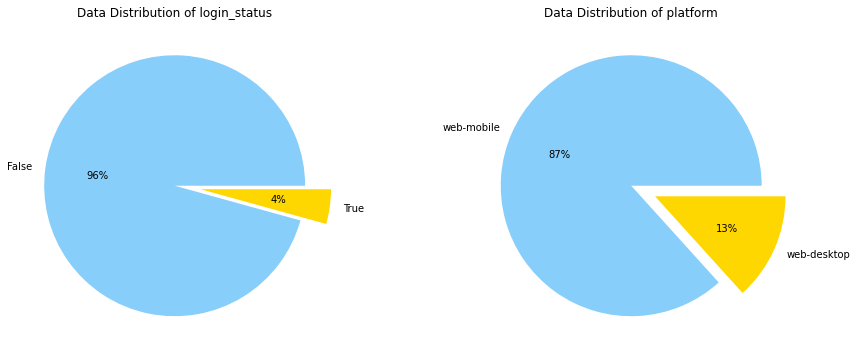

In [27]:
# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15,6))

for ax, col in zip(range(0,2), list(['login_status', 'platform'])):
    val = df_new[col].value_counts()
    labels = val.index.tolist()
    axs[ax].pie(val, labels=labels, autopct='%.0f%%', colors=['lightskyblue', 'gold'], explode=[0, 0.2])
    axs[ax].set_title(f'Data Distribution of {col}')
plt.show()

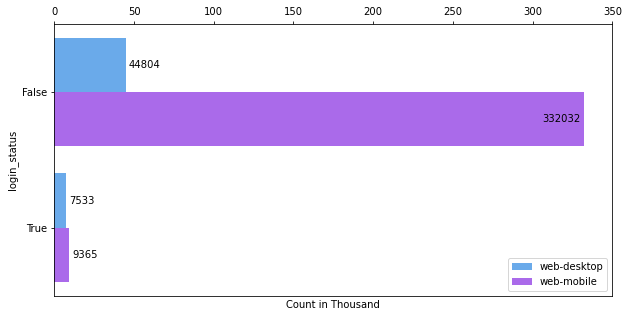

In [131]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_new, y='login_status', hue='platform', palette='cool')
plt.xlabel('Count in Thousand')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000).astype(int))
plt.legend(loc='lower right')

for p in ax.patches:
    if p.get_width() > 300000:
        x = p.get_x() + p.get_width() - 26000
    else:
        x = p.get_x() + p.get_width() + 2000
    y = p.get_y() + p.get_height()/1.8
    ax.annotate(p.get_width(), (x, y))

plt.show()

# Question

<ol>
    <li>Conduct 1 EDA from this dataset and present the exploratory, you could use presentation deck/docs/jupyter notebook, etc. Using statistics method or ML model is a plus</li>
    <li>After conducting the EDA, what kind of insight that you could extract from this datasets? If you could tell us a stories around this data, it is a plus</li>
    <li>Answer this questions:</li>
    <ul>
        <li>What kind of tools that you use to work on this dataset?</li>
        <li>Please let us know why and describe the significant advantage of that tools.</li>
    </ul>
    <li>How could we know the retention % of the users on each domain ?</li>
    <li>Can you give insight on favorable used browsers, devices, OS and platform ?</li>
    <li>Could you show the method on how to get the numbers & describe the overlapping users between each domain ?</li>
</ol>

##  Retention % of the users on each domain

In [29]:
# get top 10 domain
domain_top10 = df_new.domain.value_counts().head(10).index.tolist()
# create new column and assign domain value if in domain_top10 list
df_new['domain_top10'] = df_new['domain'].apply(lambda x: x if (x in domain_top10) else 'others')

# calculate domain retention
domain_retention = pd.DataFrame(df_new['domain_top10'].value_counts())
domain_retention['retention%'] = round((domain_retention['domain_top10']/df_new['domain_top10'].count()*100),2)
domain_retention

,domain_top10,retention%
brilio.net,83984,21.33
kapanlagi.com,82896,21.05
merdeka.com,64099,16.28
vidio.com,42147,10.70
liputan6.com,39549,10.04
bukalapak.com,35977,9.14
bola.com,12969,3.29
bola.net,11500,2.92
dream.co.id,7866,2.00
fimela.com,6795,1.73


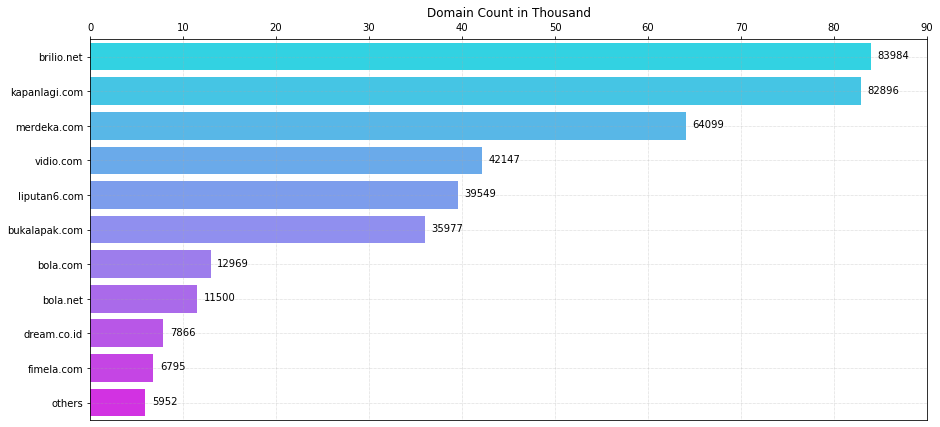

In [30]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_new, y='domain_top10', order = df_new['domain_top10'].value_counts().index, palette='cool')

plt.title('Domain Count in Thousand')
plt.xlabel('')
plt.ylabel('')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000).astype(int))
plt.xlim(0)

plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

for p in ax.patches:
    x = p.get_x() + p.get_width() + 700
    y = p.get_y() + p.get_height()/1.8
    ax.annotate(p.get_width(), (x, y))

plt.show()

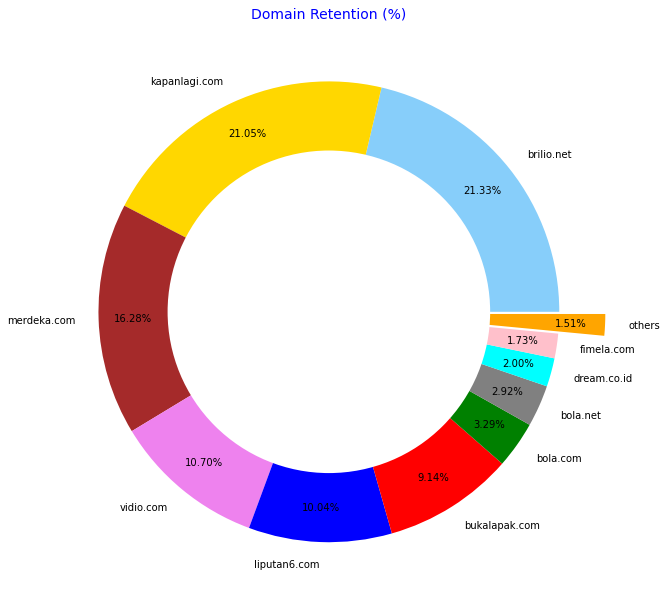

In [124]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
labels = domain_retention.index.tolist()
retention = domain_retention['retention%']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
color = ['lightskyblue', 'gold', 'brown', 'violet', 'blue', 'red', 'green', 'gray', 'cyan', 'pink', 'orange']
ax.pie(retention, labels=labels, autopct='%.2f%%', explode=explode, pctdistance=0.85, colors=color)
plt.title('Domain Retention (%)', fontsize=14, color='blue')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
f = plt.gcf()
f.gca().add_artist(centre_circle)

plt.show()

##  Retention % of the users on each device

In [113]:
# get top 10 device
device_top10 = df_new.device.value_counts().head(10).index.tolist()
# create new column and assign device value if in device_top10 list
df_new['device_top10'] = df_new['device'].apply(lambda x: x if (x in device_top10) else 'other')

# calculate device retention
device_retention = pd.DataFrame(df_new['device_top10'].value_counts())
device_retention['retention%'] = round((device_retention['device_top10']/df_new['device_top10'].count()*100),2)
device_retention

,device_top10,retention%
generic,94184,23.92
samsung,84770,21.53
generic_android,58815,14.94
xiaomi,52776,13.40
undefined,47524,12.07
vivo,22410,5.69
apple,16862,4.28
asus,6521,1.66
other,5194,1.32
huawei,2673,0.68


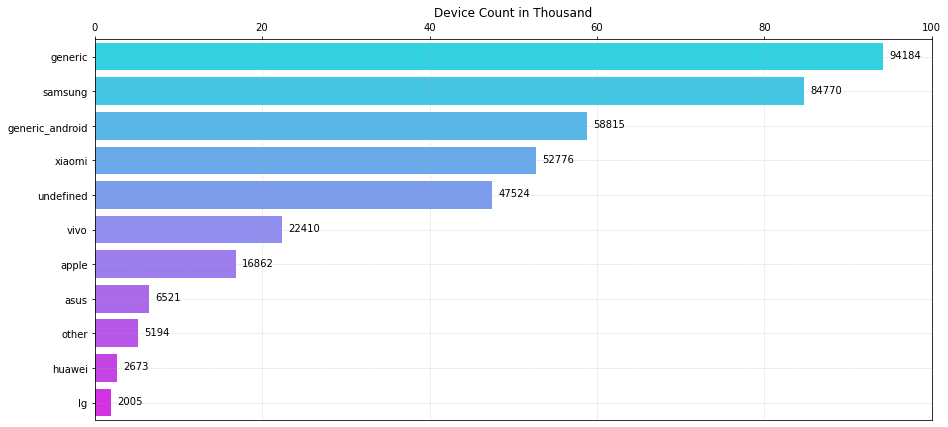

In [114]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_new, y='device_top10', order = df_new['device_top10'].value_counts().index, palette='cool')

plt.title('Device Count in Thousand')
plt.xlabel('')
plt.ylabel('')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000).astype(int))
plt.xlim(0)

plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

for p in ax.patches:
    x = p.get_x() + p.get_width() + 700
    y = p.get_y() + p.get_height()/1.8
    ax.annotate(p.get_width(), (x, y))

plt.show()

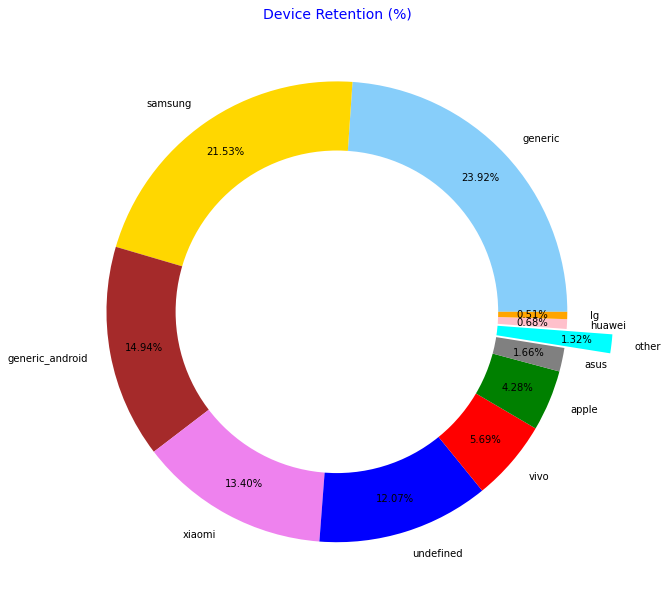

In [123]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
labels = device_retention.index.tolist()
retention = device_retention['retention%']
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0]
color = ['lightskyblue', 'gold', 'brown', 'violet', 'blue', 'red', 'green', 'gray', 'cyan', 'pink', 'orange']
ax.pie(retention, labels=labels, autopct='%.2f%%', explode=explode, pctdistance=0.85, colors=color)
plt.title('Device Retention (%)', fontsize=14, color='blue')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
f = plt.gcf()
f.gca().add_artist(centre_circle)

plt.show()

##  Retention % of the users on each browser

In [116]:
def get_browser(data):
    if data[0:5] == 'blios':
        data= 'ios'
    elif 'opera' in data.split(' '):
        data= 'opera'
    elif 'chrome' in data.split(' '):
        data= 'chrome'
    elif 'safari' in data.split(' '):
        data= 'safari'
    elif 'firefox' in data.split(' '):
        data= 'firefox'
    return data

In [117]:
# get cleaning browser
df_new['browser_top10'] = df_new['browser'].apply(lambda x: get_browser(x))
# get top 10 browser
browser_top10 = df_new.browser_top10.value_counts().head(10).index.tolist()
# assign browser value if in browser_top10 list
df_new['browser_top10'] = df_new['browser_top10'].apply(lambda x: x if (x in browser_top10) else 'other')

# calculate device retention
browser_retention = pd.DataFrame(df_new['browser_top10'].value_counts())
browser_retention['retention%'] = round((browser_retention['browser_top10']/df_new['browser_top10'].count()*100),2)
browser_retention

,browser_top10,retention%
chrome,228184,57.95
facebook,107986,27.43
safari,10306,2.62
samsung internet,8243,2.09
other,8154,2.07
uc browser,6788,1.72
firefox,6464,1.64
pale moon,5324,1.35
bacaberita app,4279,1.09
opera,4182,1.06


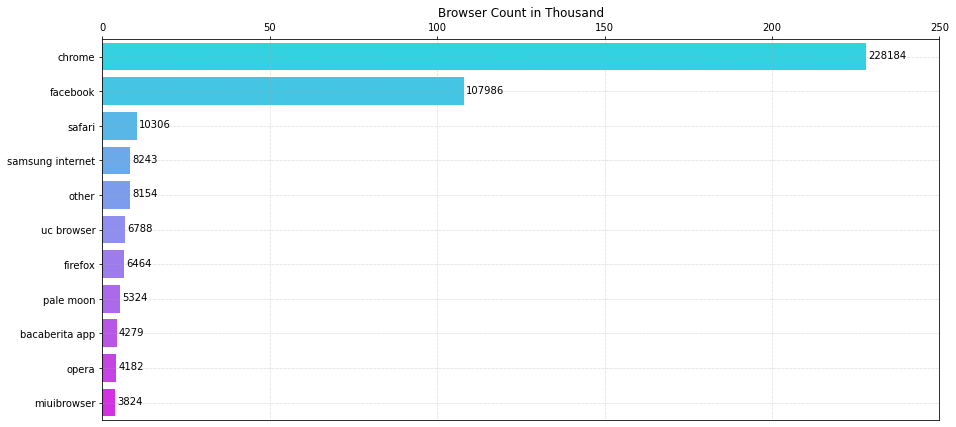

In [118]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize=(15,7))
ax = sns.countplot(data=df_new, y='browser_top10', order = df_new['browser_top10'].value_counts().index, palette='cool')

plt.title('Browser Count in Thousand')
plt.xlabel('')
plt.ylabel('')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000).astype(int))
plt.xlim(0)

plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

for p in ax.patches:
    x = p.get_x() + p.get_width() + 700
    y = p.get_y() + p.get_height()/1.8
    ax.annotate(p.get_width(), (x, y))

plt.show()

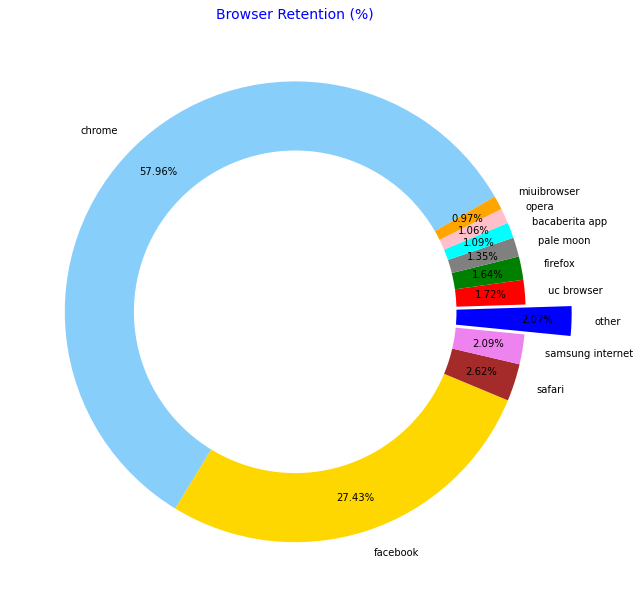

In [129]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
labels = browser_retention.index.tolist()
retention = browser_retention['retention%']
explode = [0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0]
color = ['lightskyblue', 'gold', 'brown', 'violet', 'blue', 'red', 'green', 'gray', 'cyan', 'pink', 'orange']
ax.pie(retention, labels=labels, autopct='%.2f%%', explode=explode, pctdistance=0.85, colors=color, startangle=30)
plt.title('Browser Retention (%)', fontsize=14, color='blue')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
f = plt.gcf()
f.gca().add_artist(centre_circle)

plt.show()

##  Favorable used browsers, devices, OS and platform 

In [36]:
for col in list(['browser', 'device', 'os', 'platform']):
    val_count = df_new[col].value_counts()
    fav, number, percent = val_count.index[0], val_count[0], round((val_count[0]/df_new[col].count()*100), 2)
    print(f'Favorable used \033[1m{col}\033[0m is \033[1m{fav}\033[0m for {number} users ({percent}%)')

Favorable used browser is chrome mobile for 178700 users (45.39%)
Favorable used device is generic for 94184 users (23.92%)
Favorable used os is android for 329295 users (83.63%)
Favorable used platform is web-mobile for 341397 users (86.71%)


In [136]:
df_group = (df_new.groupby(['domain_top10', 'platform', 'browser_top10', 'device_top10'])['login_status']
            .count()
            .reset_index()
            .rename(columns={'login_status':'count'}))
df_group = df_group.sort_values(by='count', ascending=False).reset_index(drop=True)
df_group.head()

,domain_top10,platform,browser_top10,device_top10,count
0,merdeka.com,web-mobile,chrome,generic,15831
1,brilio.net,web-mobile,facebook,generic,12904
2,brilio.net,web-mobile,facebook,samsung,12075
3,merdeka.com,web-mobile,chrome,samsung,11649
4,bukalapak.com,web-desktop,chrome,undefined,10837


In [137]:
fig = px.treemap(df_group, path=['domain_top10', 'platform', 'browser_top10', 'device_top10'], values='count', 
                 color='count', color_continuous_scale='magma',
                 title='Favorable used platform, domain and device')
fig.show()

In [38]:
# create dataframe
df_group = (df_new.groupby(['platform', 'os', 'device'])['login_status']
            .count()
            .reset_index()
            .rename(columns={'login_status':'count'}))
df_group = df_group.sort_values(by='count', ascending=False).reset_index(drop=True)

# plot sunburst
fig = px.sunburst(df_group, path=['platform', 'os', 'device'], values='count', 
                  #color='count', color_continuous_scale='magma',
                  title='Favorable used platform, os, and device')
fig.show()

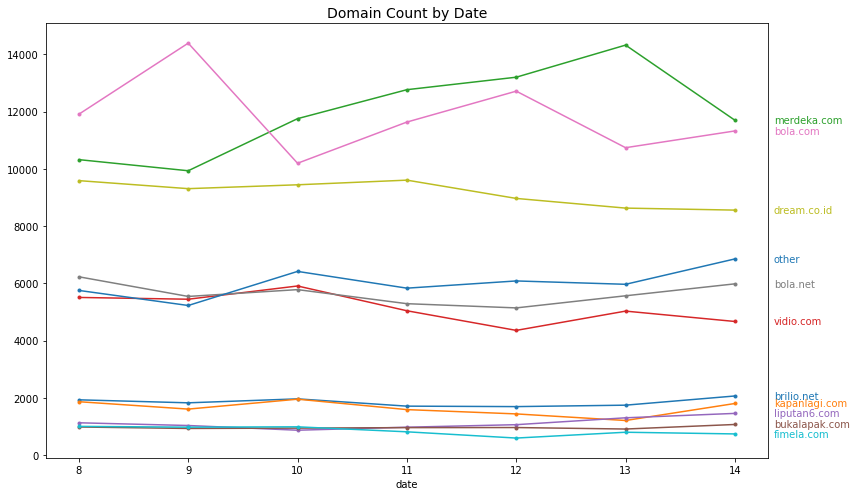

In [171]:
ax = df_new.groupby(['date', 'domain_top10'])['date'].count().unstack().plot(marker='.', legend=False)
plt.title('Domain Count by Date', fontsize=14)
for line, name in zip(ax.lines, df_new['domain_top10'].value_counts().index):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                va="center")

plt.gcf().set_size_inches(12, 7)
plt.tight_layout()
plt.show()

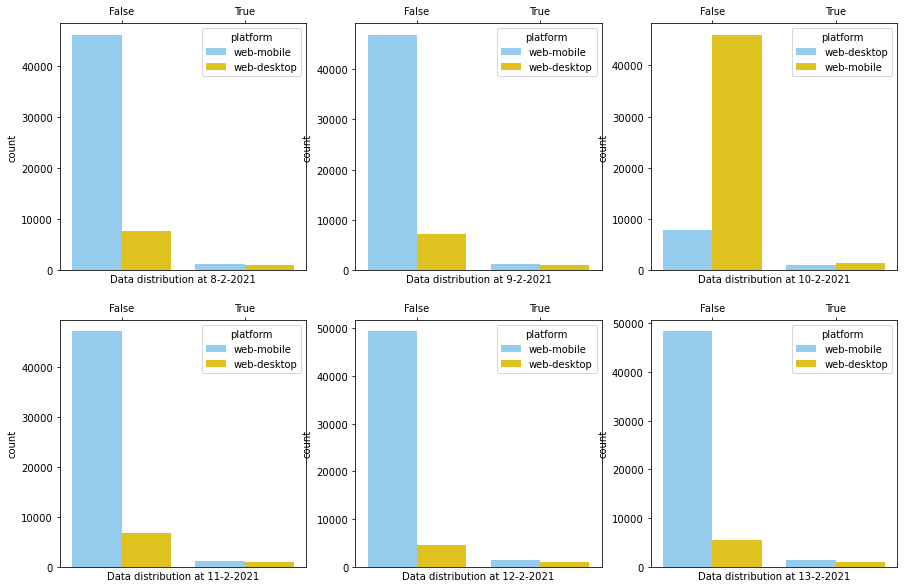

In [130]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
date = 8
for x in range(2):
    for y in range(3):
        data = df_new[df_new['date'] == date]
        sns.countplot(data=data, x='login_status', hue='platform', palette=['lightskyblue', 'gold'], 
                      ax=ax[x][y])
        ax[x][y].set_xlabel(f'Data distribution at {date}-2-2021')
        date+=1
plt.show()

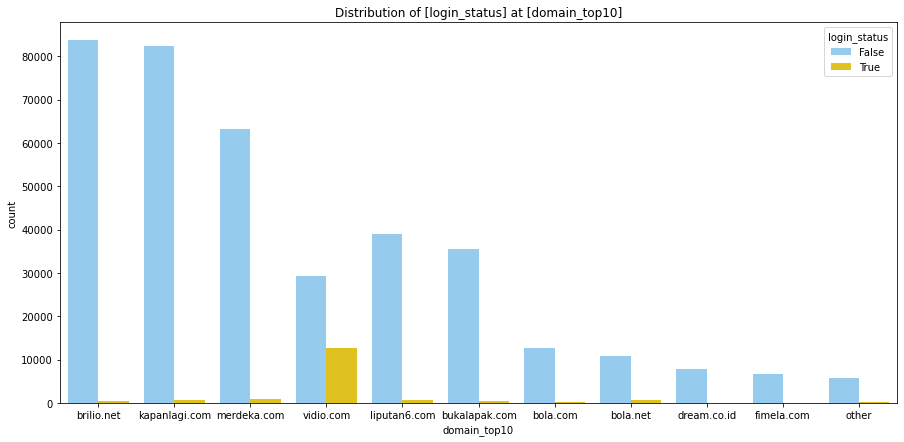

In [169]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_new, x='domain_top10', hue='login_status', 
              order = df_new['domain_top10'].value_counts().index, palette=['lightskyblue', 'gold'])
plt.title('Distribution of [login_status] at [domain_top10]')
plt.show()

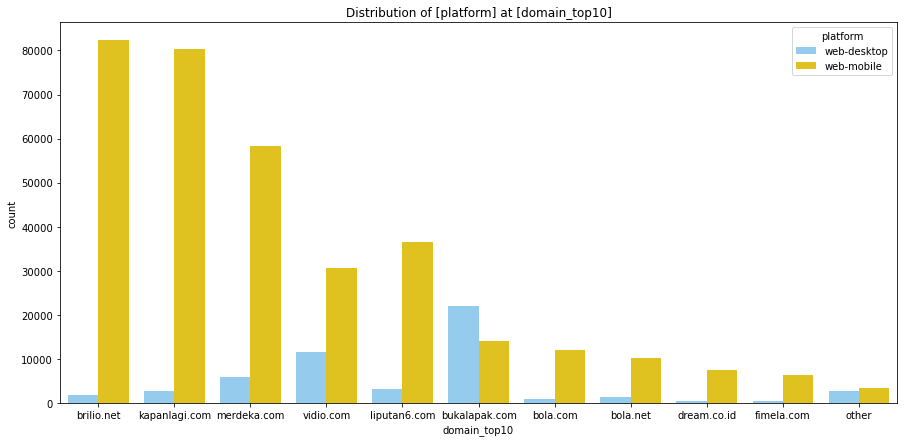

In [170]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_new, x='domain_top10', hue='platform', 
              order = df_new['domain_top10'].value_counts().index, palette=['lightskyblue', 'gold'])
plt.title('Distribution of [platform] at [domain_top10]')
plt.show()